[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset

Let's first of all have a look at the data. You can download the file `labeledTrainData.tsv` on the [Kaggle website of the competition](https://www.kaggle.com/c/word2vec-nlp-tutorial/data), or on our [Google Drive](https://drive.google.com/file/d/1a1Lyn7ihikk3klAX26fgO3YsGdWHWoK5/view?usp=sharing)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Import pandas, numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read dataset with extra params sep='\t', encoding="latin-1"
data = pd.read_csv('/content/drive/My Drive/data/labeledTrainData.tsv', sep='\t', encoding='latin-1')
data.sample(5)

,id,sentiment,review
23621,9712_10,1,Another review likened this troupe to a cross ...
9832,11542_2,0,An unpleasant woman and an equally unpleasant ...
14189,4935_1,0,"\Cavemen\"" exceeded my expectations, and not i..."
15770,10566_3,0,While I count myself as a fan of the Babylon 5...
14737,12044_1,0,"Went to see the movie \Troy\"" this afternoon. ..."


In [5]:
data['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [7]:
npos = len([label for label in data['sentiment'] if label==1])
nneg = 25000 - npos

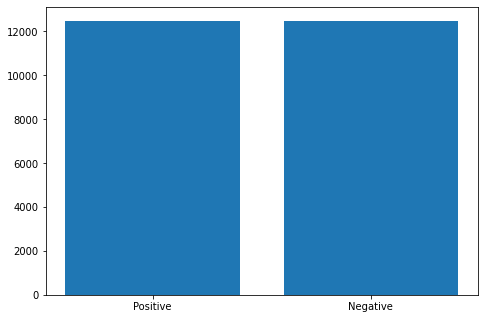

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = ['Positive', 'Negative']
ax.bar(labels, [npos, nneg])
plt.show()

## 2. Preprocessing

In [9]:
# stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopword(text):
  for word in text:
    if word in stop_words:
      text.remove(word)
  return text

In [11]:
# Removing special characters and "trash"
import re
def preprocessor(text):
    # Remove HTML markup
    html =  re.compile(r'<.*?>')
    text = re.sub(html, '', text)
    
    # Save emoticons for later appending
    # Your code here
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    # Your code here
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [17]:
# tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer
# Your code here
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [13]:
# split the dataset in train and test
# Your code here
from sklearn.model_selection import train_test_split

y = data['sentiment']
X = data['review']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [18]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=96))])
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f0274374378>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f02859fbf28>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
         

## 4. Evaluate Model

In [19]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.8894
confusion matrix:
 [[2174  304]
 [ 249 2273]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2478
           1       0.88      0.90      0.89      2522

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## 5. Export Model 

In [ ]:
# Using pickle to export our trained model
import pickle
import os

pickle.dump(clf, open('popcorn.pkl', 'wb'))